# Dai Modelli Lineari ai Percettroni Multistrato

## _Apprendimento Automatico_ | LM in *Data Science*

<br>    

da Python Machine Learning - Code Examples ch. [2](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch02),[12](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12) | scikit-learn doc. e [user guide](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [1]:
from IPython.display import Image
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

### Esempio: regressione con feature polinomiali

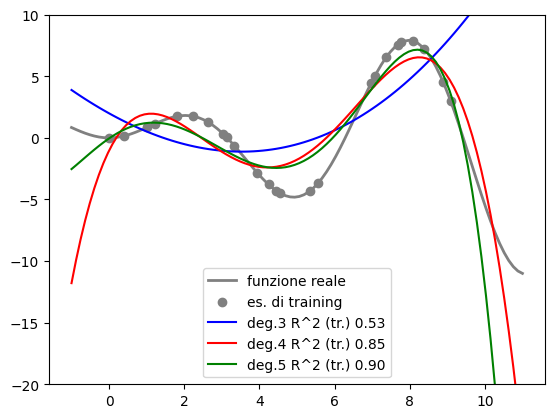

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)


# range di valori da mostrare
x_plot = np.linspace(-1, 11, 100)
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(42)
x_train = np.sort(rng.choice(x_train, size=25, replace=False))
y_train = f(x_train)

# crea array 2d per i transformer
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# plot funzione
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["gray", "blue", "red", "green", "tomato", "orange"])
ax.plot(x_plot, f(x_plot), linewidth=lw, label="funzione reale")

# plot training set
ax.scatter(x_train, y_train, label="es. di training")

# feature polinomiali
for degree in [3, 4, 5]:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), SGDRegressor())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    score = model.score(X_train,y_train)
    ax.plot(x_plot, y_plot, label=f"deg.{degree} R^2 (tr.) {score:1.2f}")

ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()

## Percettroni

**Neurone Artificiale**: regola di apprendimento

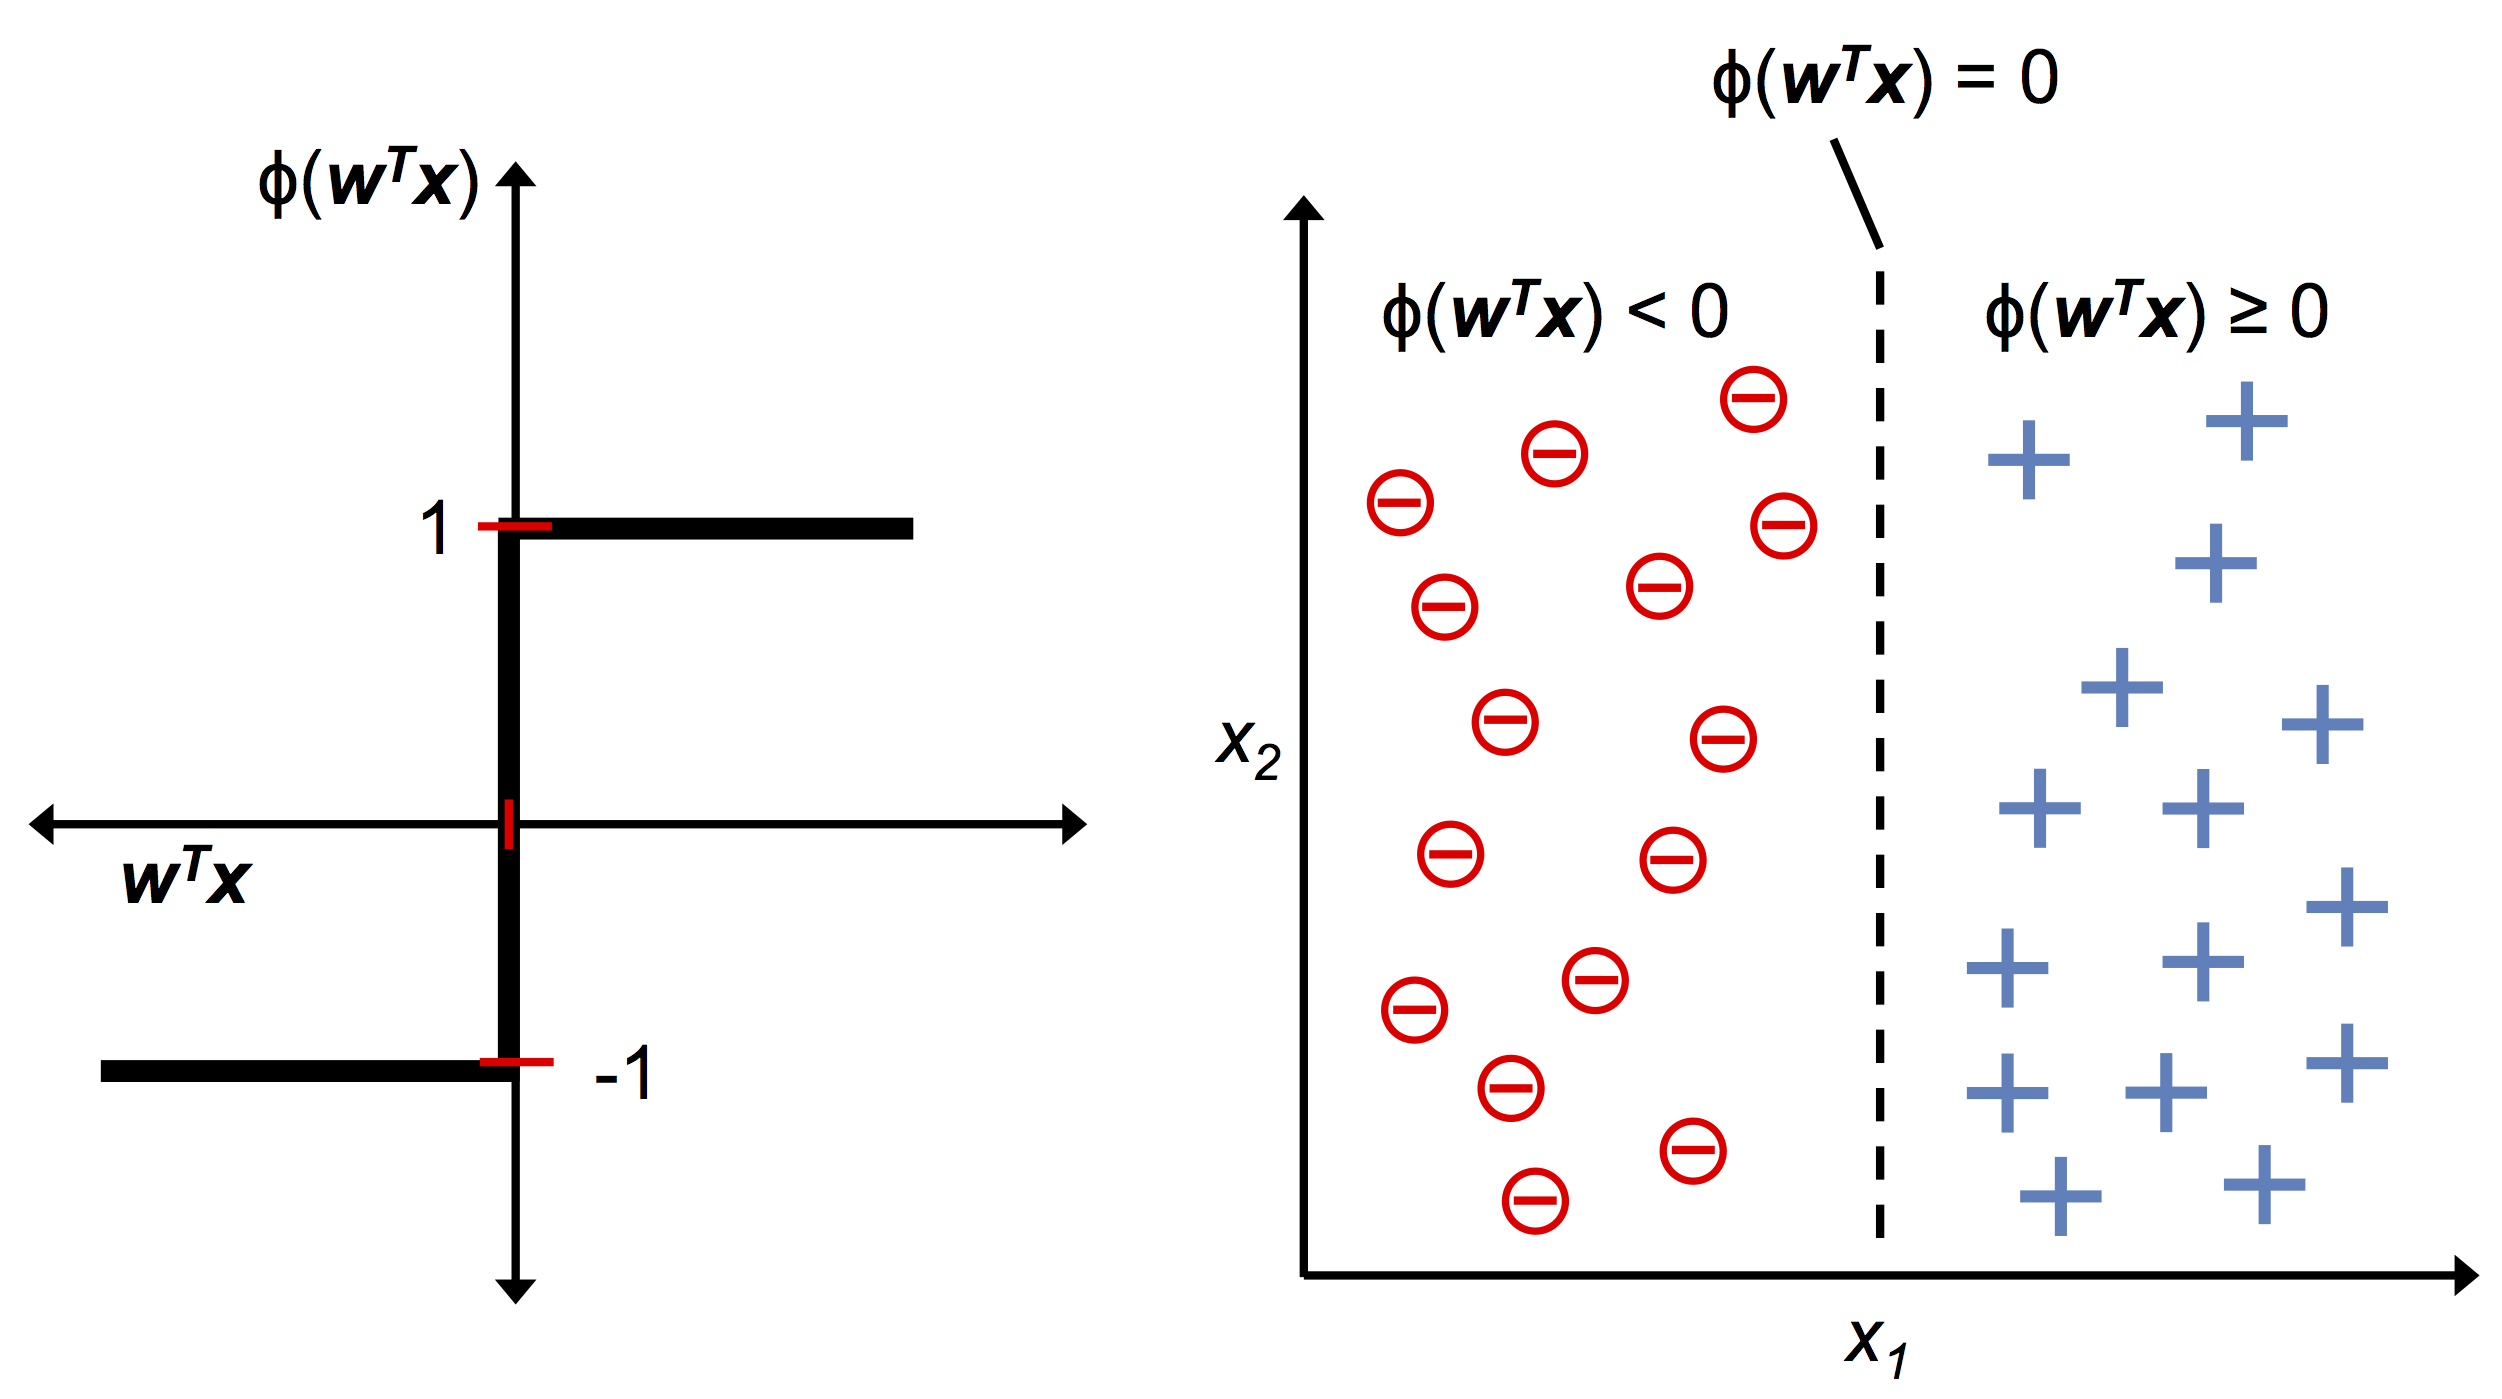

**Separabilità**

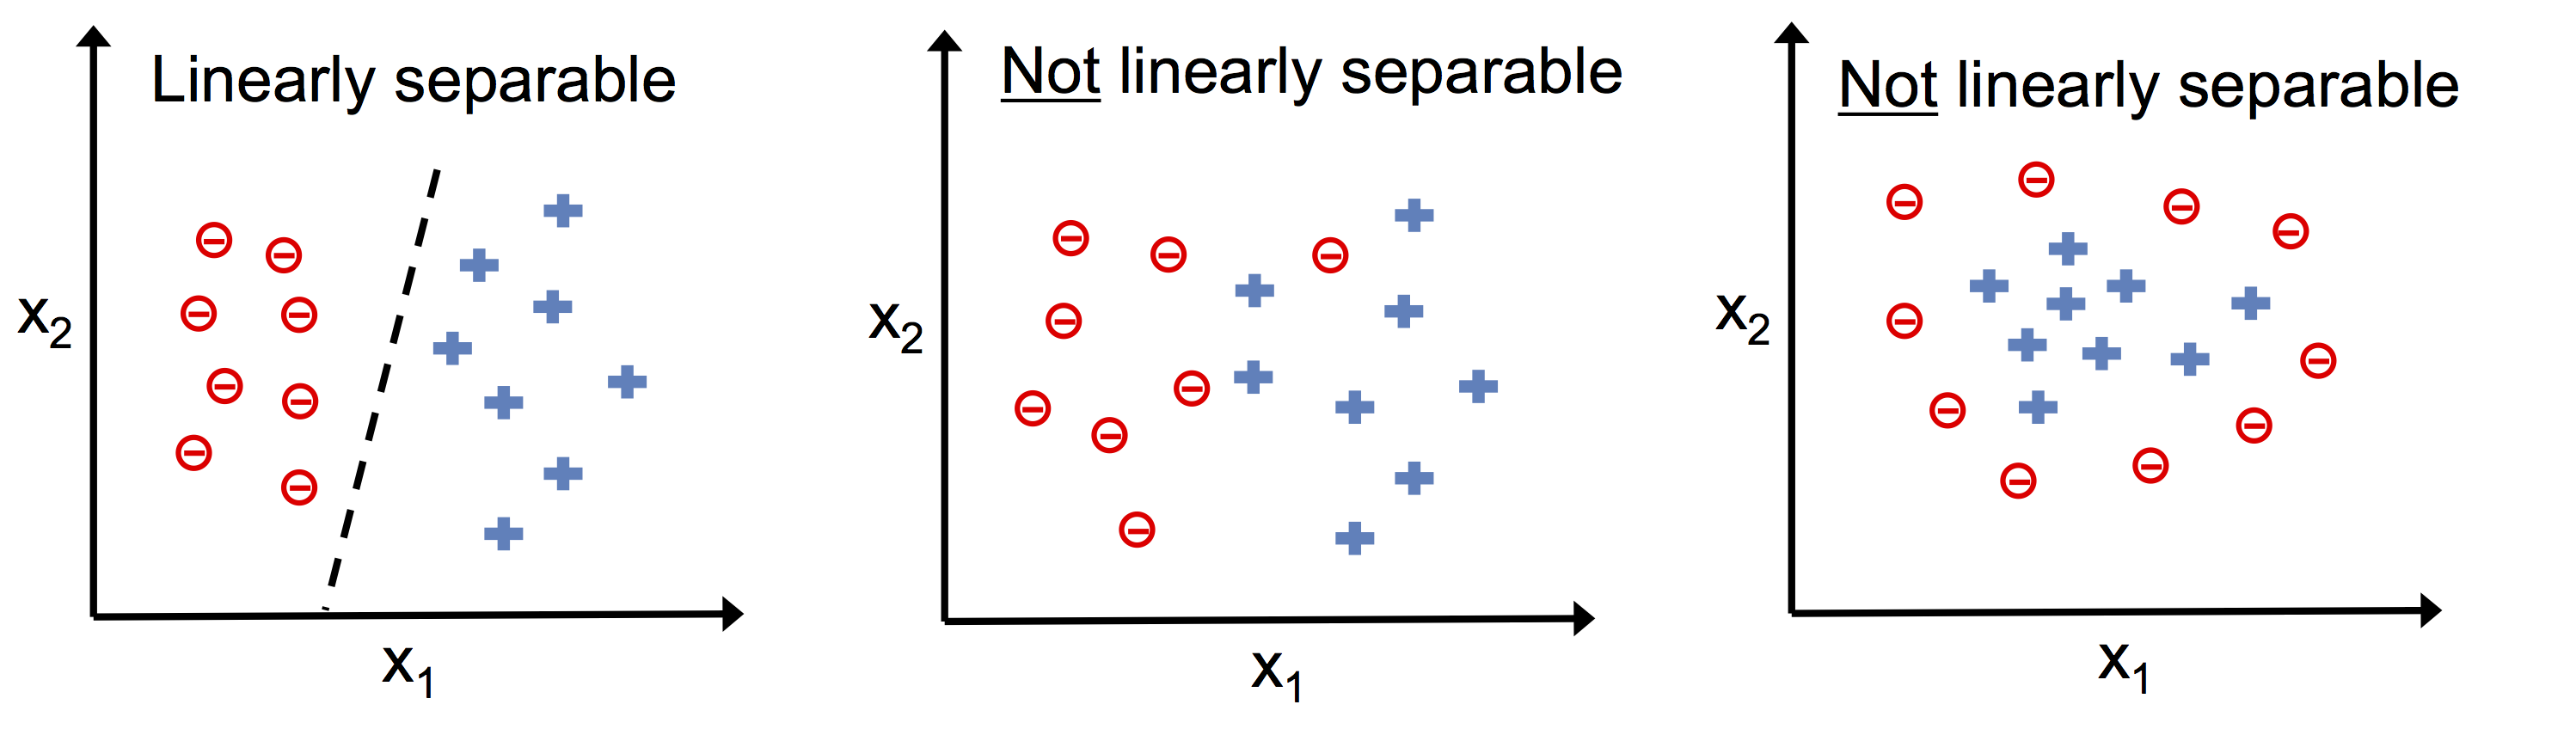

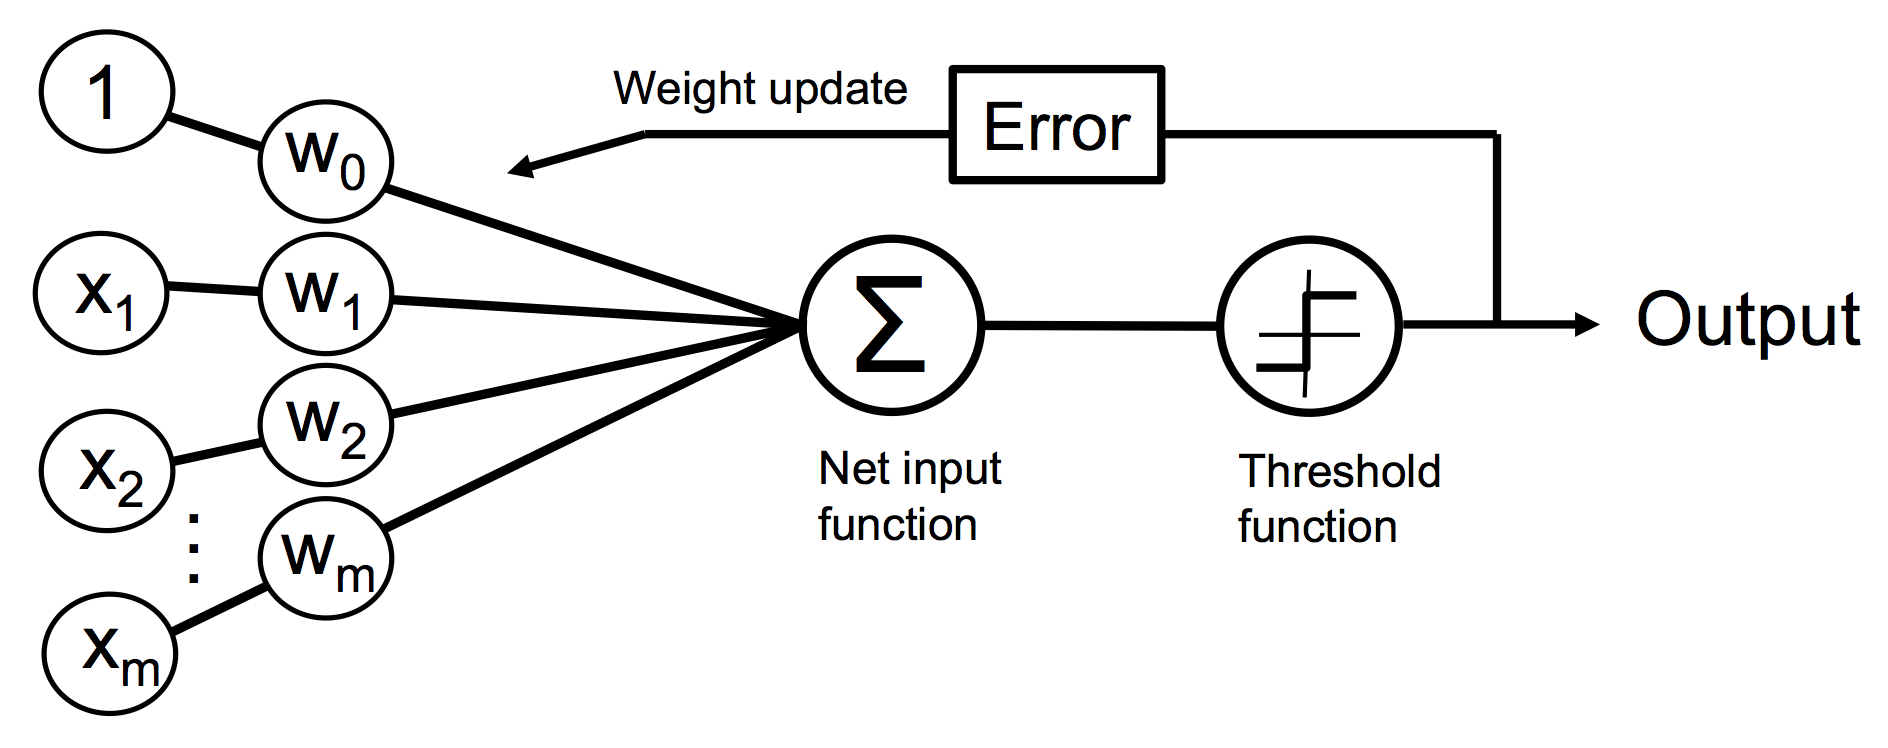

### Implementazione

In [3]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Esempio di Addestramento su IRIS

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

**Estrazione e Plot dei Dati** (solo 2 feature e 2 classi)

In [5]:
# solo classi setosa e versicolor: primi 100 es.
y = iris.target[0:100]
y = np.where(y == 0, -1, 1)
# estrae solo sepal length e petal length
X = iris.data[0:100, [0, 2]]

#print(X.T)
print(y.T)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


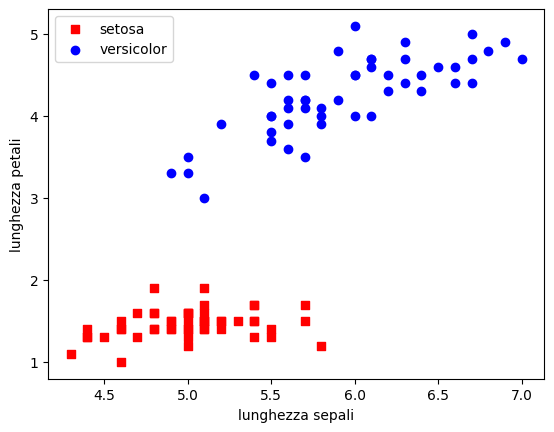

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='s', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='versicolor')
plt.xlabel('lunghezza sepali')
plt.ylabel('lunghezza petali')
plt.legend(loc='upper left')
plt.show()

**Training**

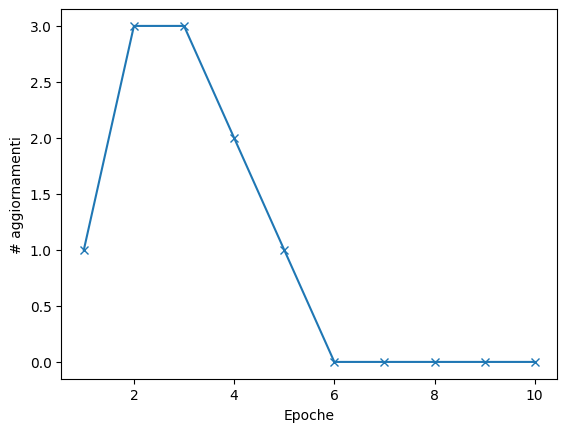

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='x')
plt.xlabel('Epoche')
plt.ylabel('# aggiornamenti')
plt.show()

In [8]:
%pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


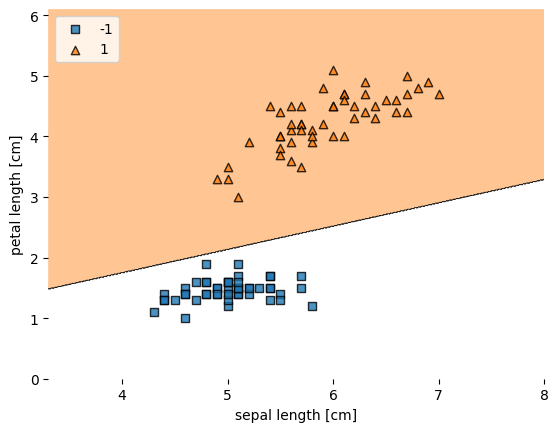

In [9]:
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=ppn, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Neuroni Lineari Adattivi e Convergenza

#### Minimizzazzione delle funzioni di costo con GD

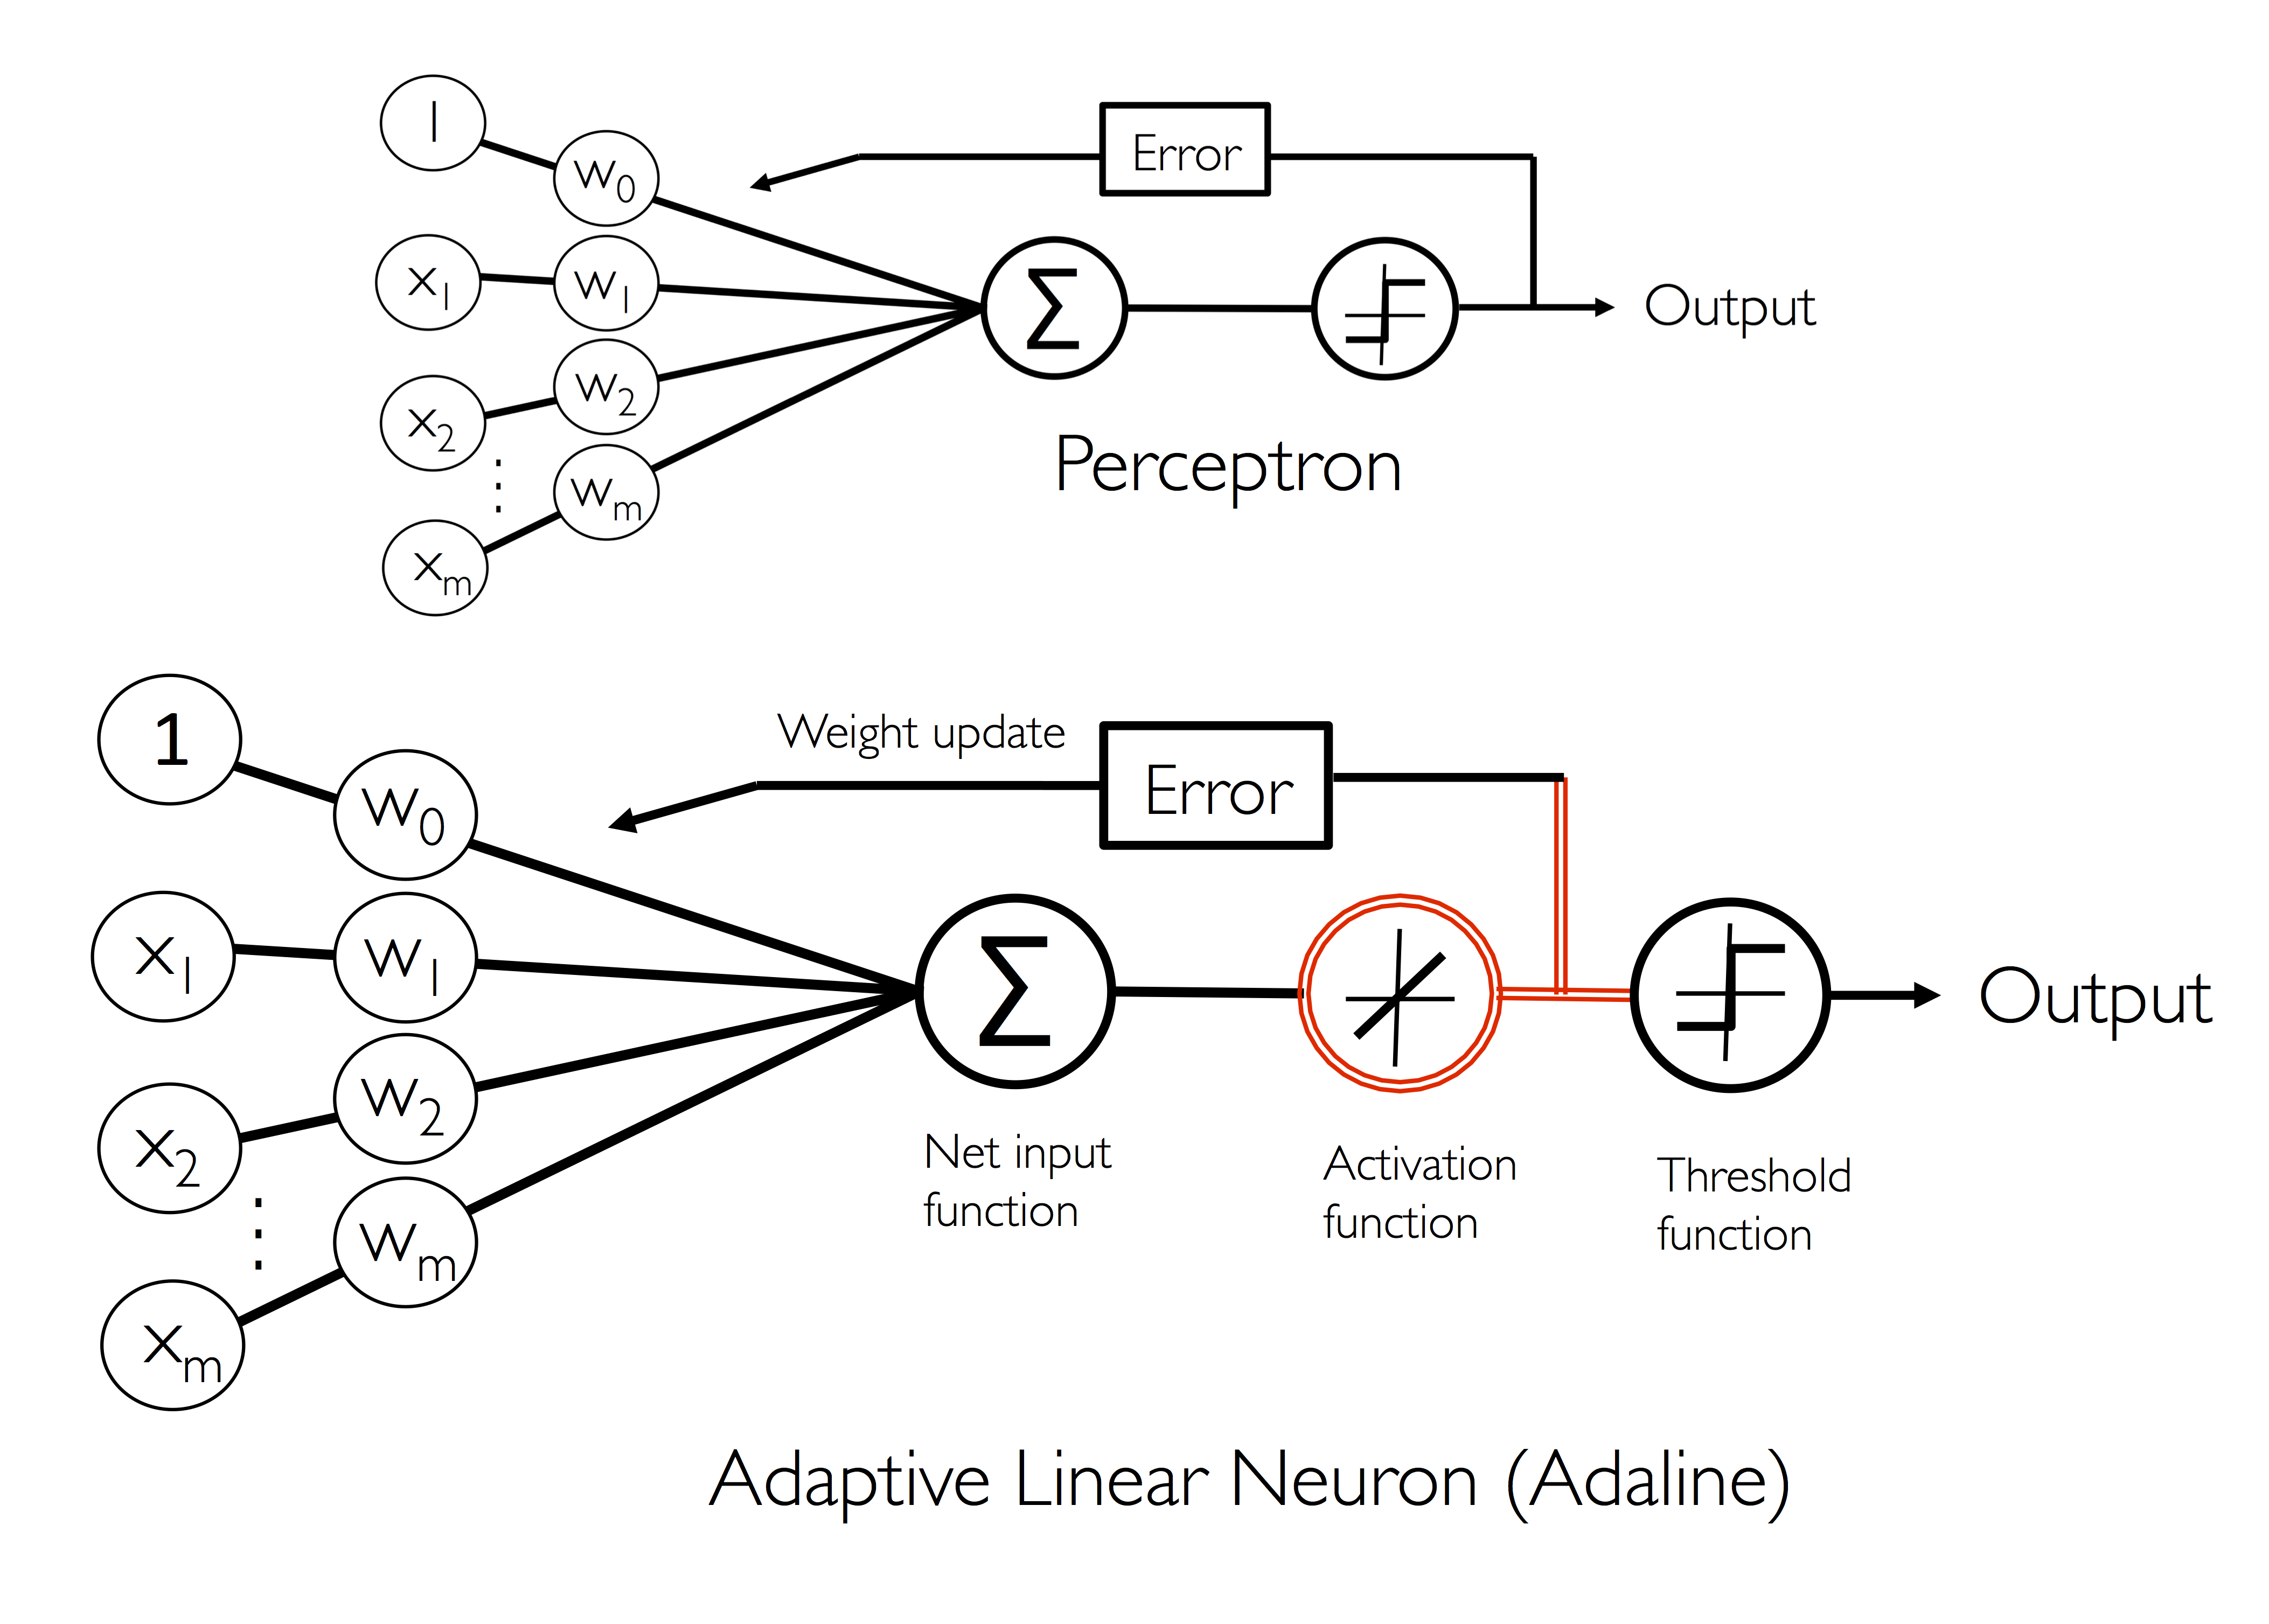


**Implementazione**

In [10]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_18454/1616738848.py:6: SyntaxWarning: invalid escape sequence '\e'
  ax[0].set_title('Adaline: $\eta$ = 0.01')
/tmp/ipykernel_18454/1616738848.py:11: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_title('Adaline: $\eta$ = 0.0001')


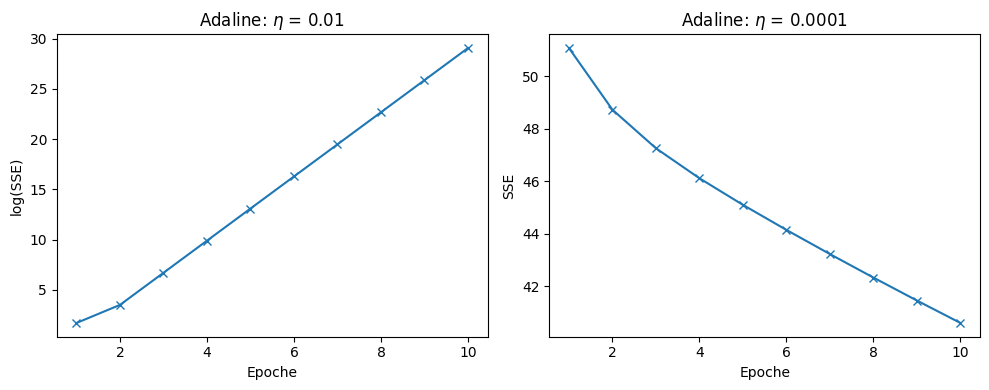

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='x')
ax[0].set_xlabel('Epoche')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline: $\eta$ = 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x')
ax[1].set_xlabel('Epoche')
ax[1].set_ylabel('SSE')
ax[1].set_title('Adaline: $\eta$ = 0.0001')
plt.tight_layout()

Differenza di _learning rate_ $\eta$ ($J$ funzione da minimizzare)

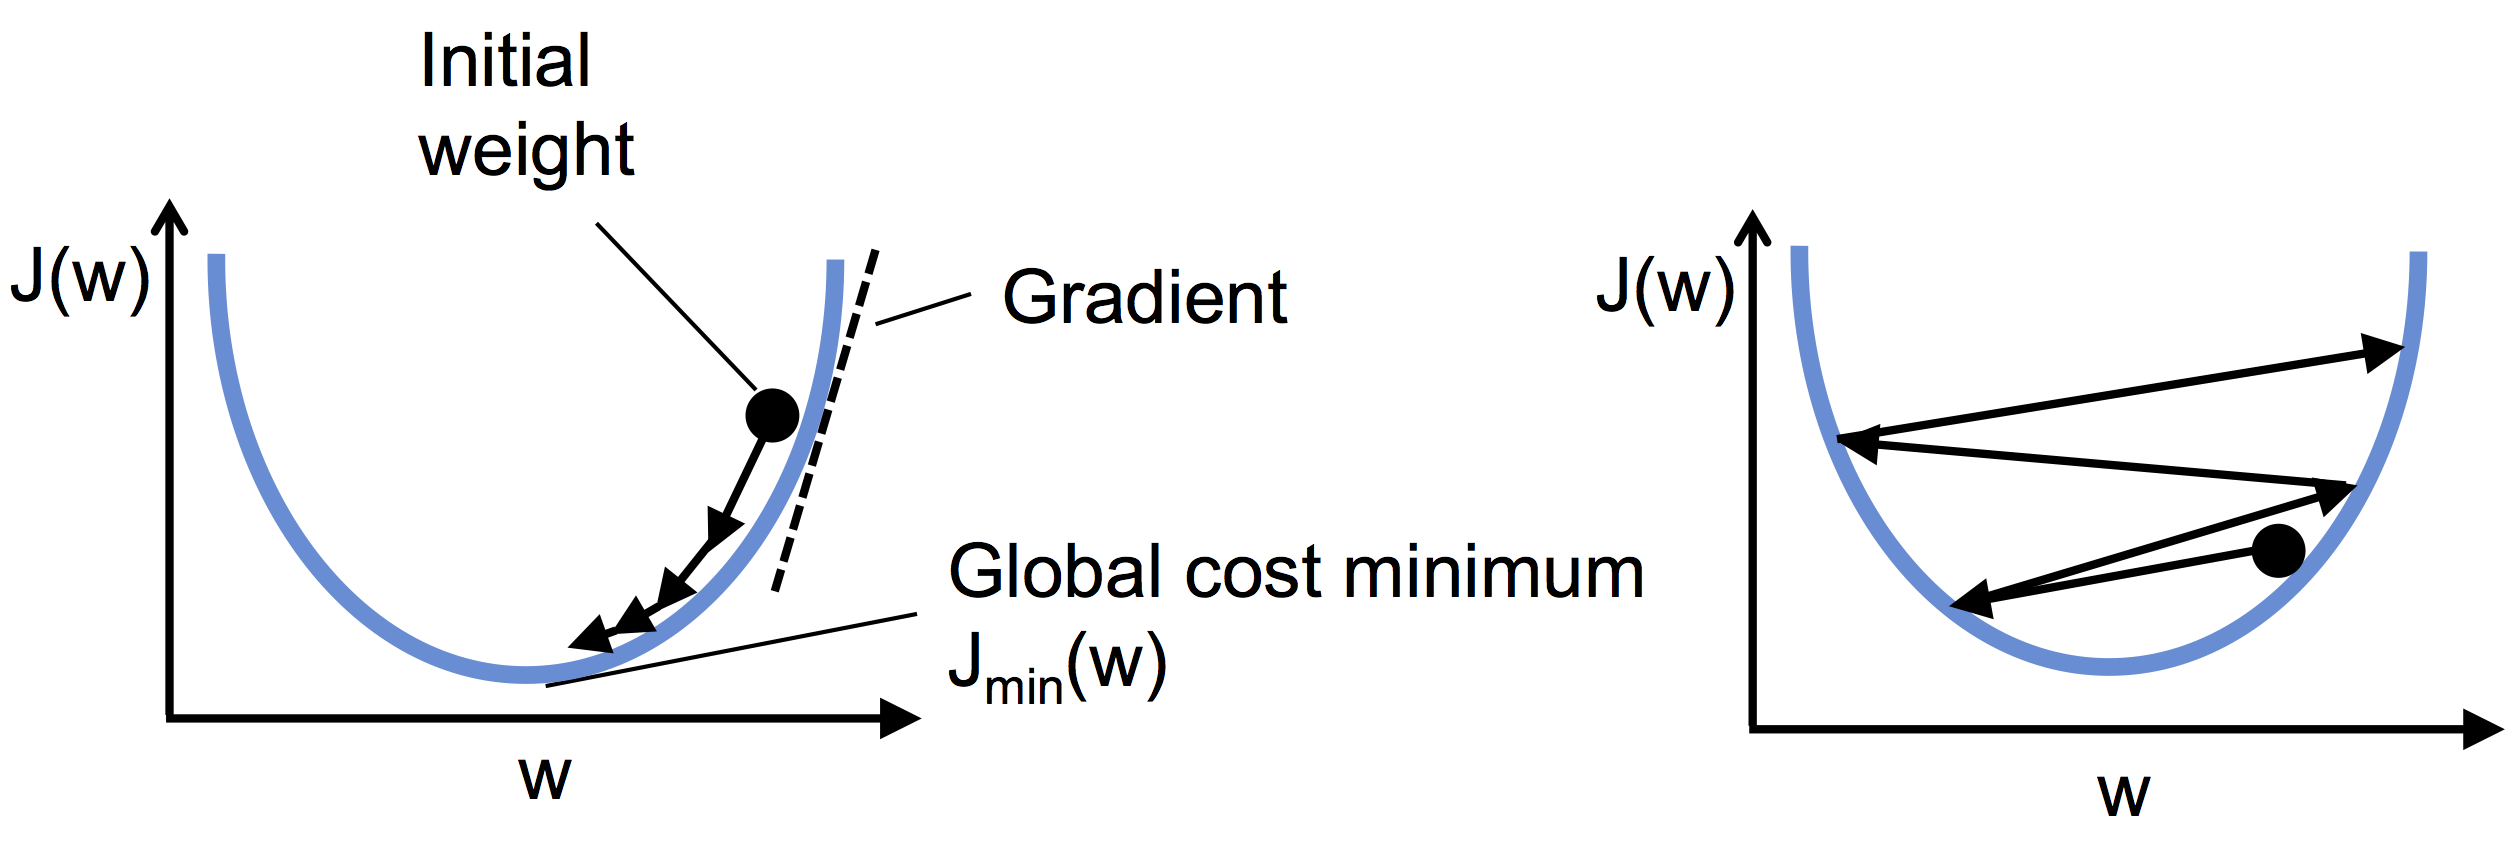

In [12]:
# standardizzazione 
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

#### Feature scaling

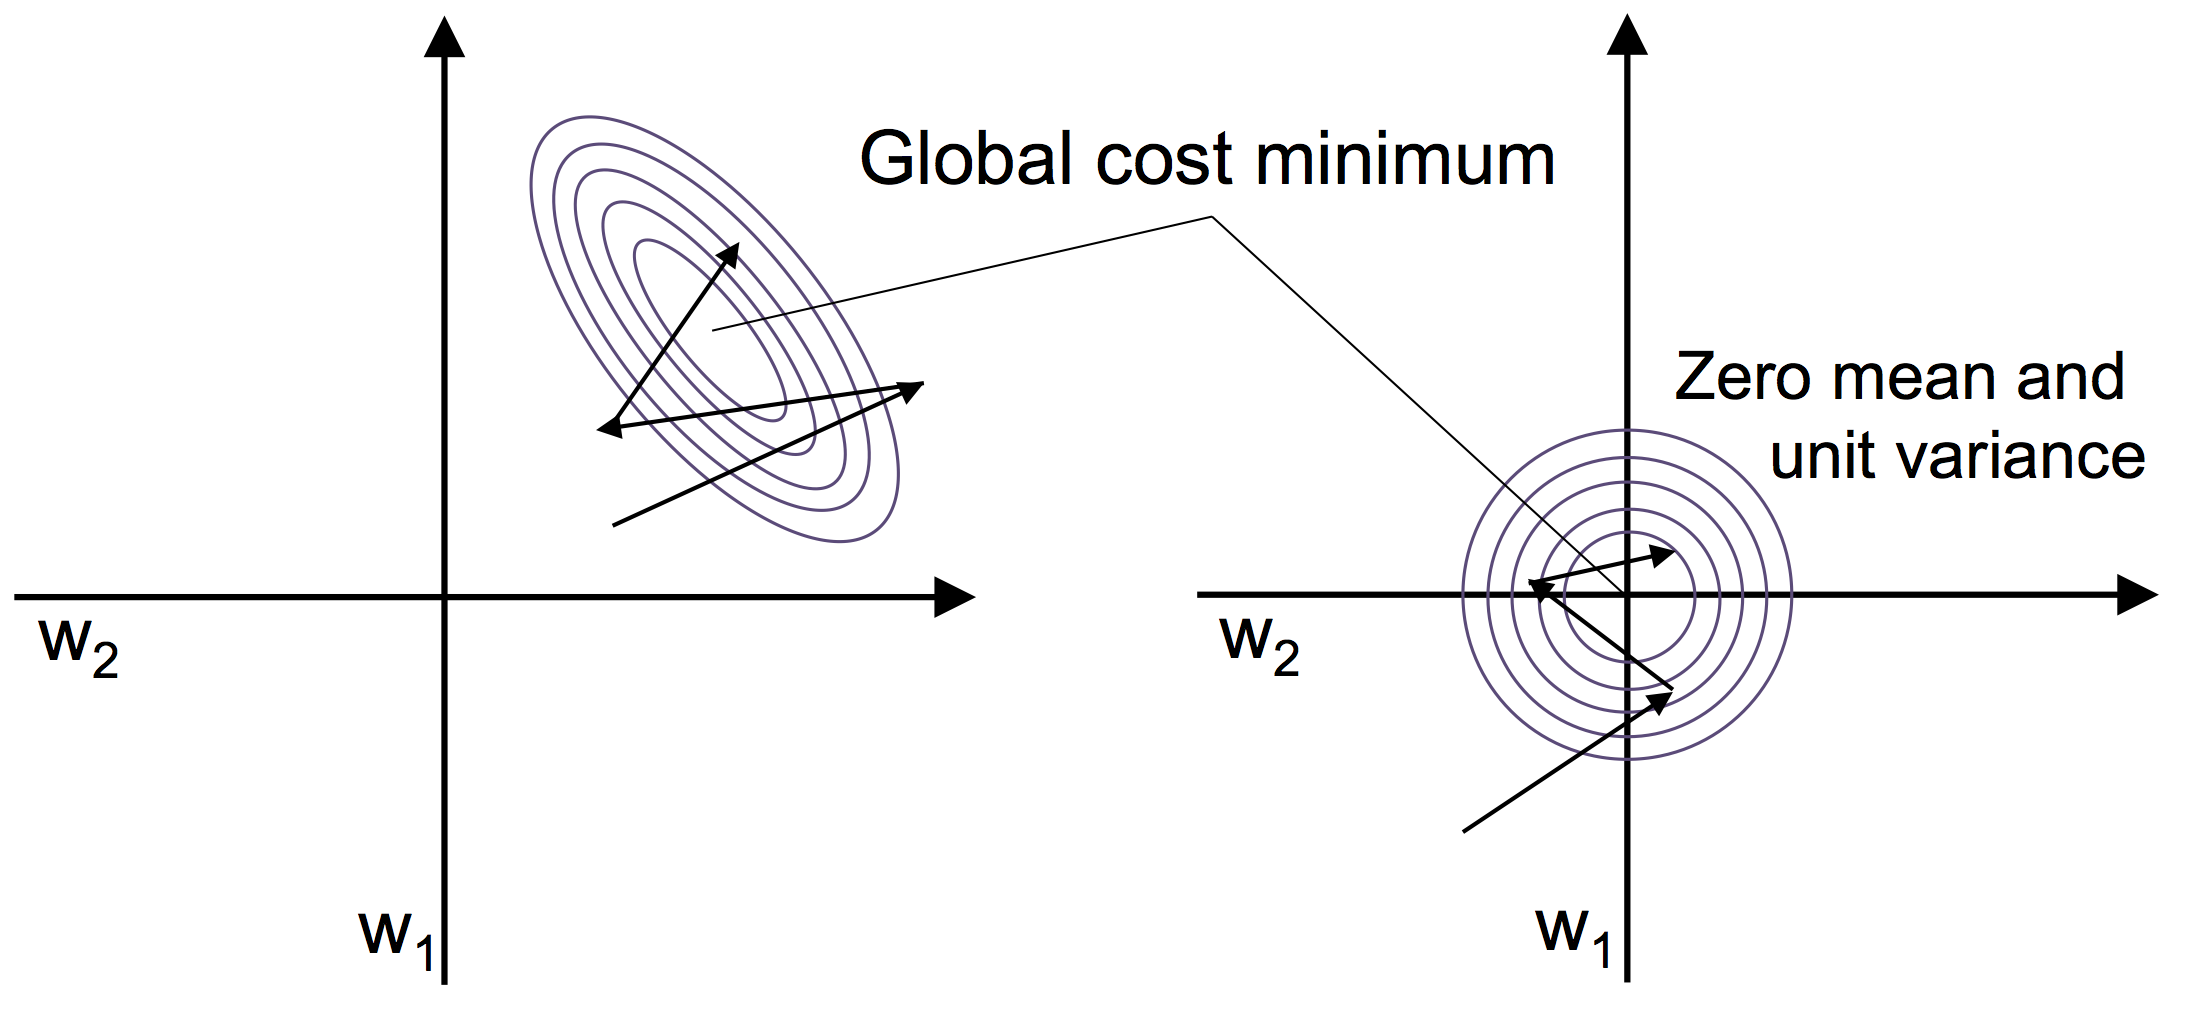

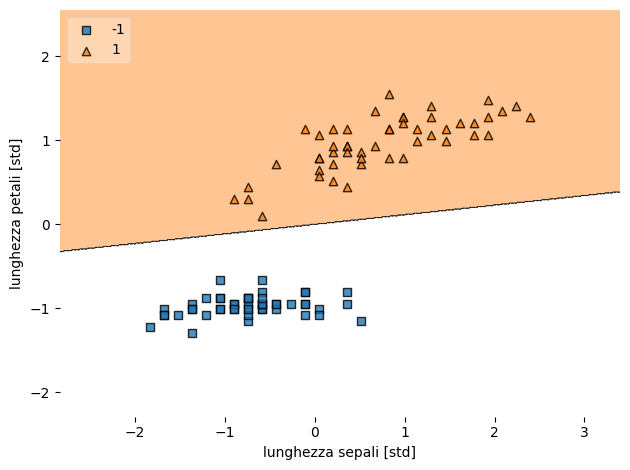

In [13]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, clf=ada_gd, legend=2)
plt.xlabel('lunghezza sepali [std]')
plt.ylabel('lunghezza petali [std]')
plt.tight_layout()

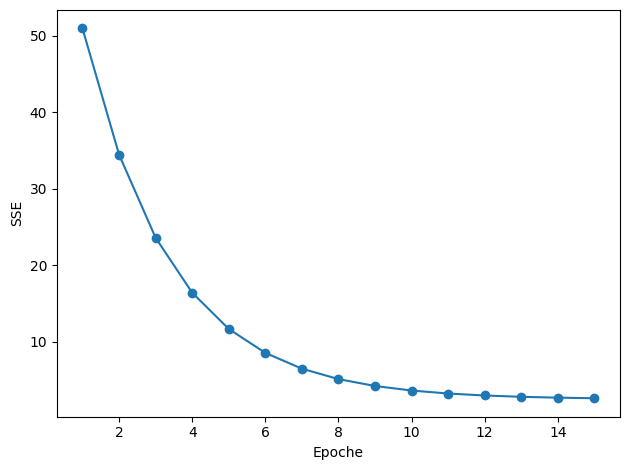

In [14]:
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epoche')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

## Percettroni in `scikit-learn`

Classe [`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#sklearn.linear_model.Perceptron) equivalente a [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) con specifici valori per gli iperparametri:
- `loss="perceptron"`
- `learning_rate="constant"` 
- `eta0=1` 
- `penalty=None`

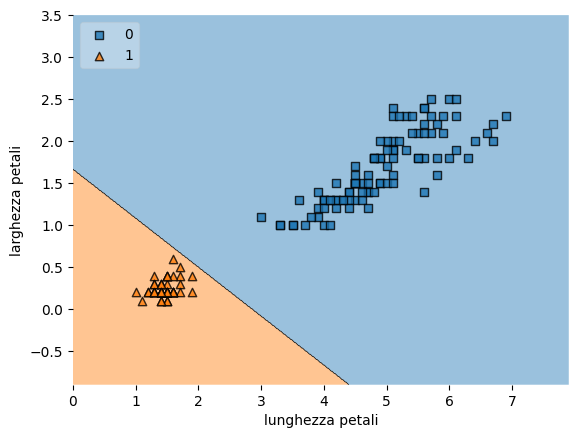

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

plot_decision_regions(X, y, clf=per_clf, legend=2)
plt.xlabel('lunghezza petali')
plt.ylabel('larghezza petali')
plt.show()

**Esempio** con il dataset `digits`

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=42)

per = Perceptron(random_state=42)
per.fit(X_train, y_train)

print("Training set score: %f" % per.score(X_train, y_train))
print("    Test set score: %f" % per.score(X_test, y_test))

Training set score: 0.954714
    Test set score: 0.928889


## Algoritmi Passive Aggressive

Famiglia di algoritmi per l'apprendimento _large-scale_: come il Percettrone non richiedono un learning rate ma si differenziano per l'ammissione della regolarizzazione (parametro `C`)

- `PassiveAggressiveClassifier` usabile con 
    - `loss='hinge'` (PA-I) o `loss='squared_hinge'` (PA-II)
- `PassiveAggressiveRegressor` usabile con 
    - `loss='epsilon_insensitive'` (PA-I) o `loss='squared_epsilon_insensitive'` (PA-II)

### Esempio confronto di solver

dalla [doc]() sklearn

training SGD
training ASGD
training Percettrone
training P-A I
training P-A II
training SAG


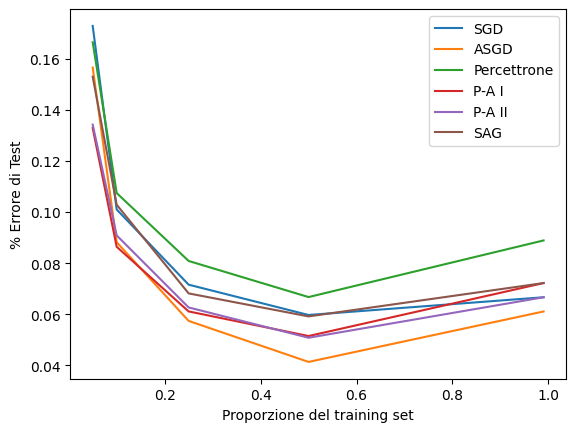

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import (LogisticRegression,Perceptron,PassiveAggressiveClassifier,SGDClassifier)
from sklearn.model_selection import train_test_split

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
# Num. di tornate per modello
rounds = 10
X, y = datasets.load_digits(return_X_y=True)

classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("ASGD", SGDClassifier(max_iter=110, average=True)),
    ("Percettrone", Perceptron(max_iter=110)),
    ("P-A I", PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),),
    ("P-A II", PassiveAggressiveClassifier(max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4),),
    ("SAG",LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0])),
]

xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proporzione del training set")
plt.ylabel("% Errore di Test")
plt.show()

## Multi-Layer Perceptron

**Vantaggi**

+ capacità di imparare modelli non lineari
+ capacità di imparare modelli on-line (`partial_fit`)

**Svantaggi**

+ hidden layer con loss non convessa $\to$ più minimi locali: <br>diverse inizializzazioni dei parametri portano a diverse misure di accuratezza
+ diversi iperparametri da regolare: <br> numero di unità latenti, di layer, di iterazioni
+ sensibilità alle diverse scale delle feature

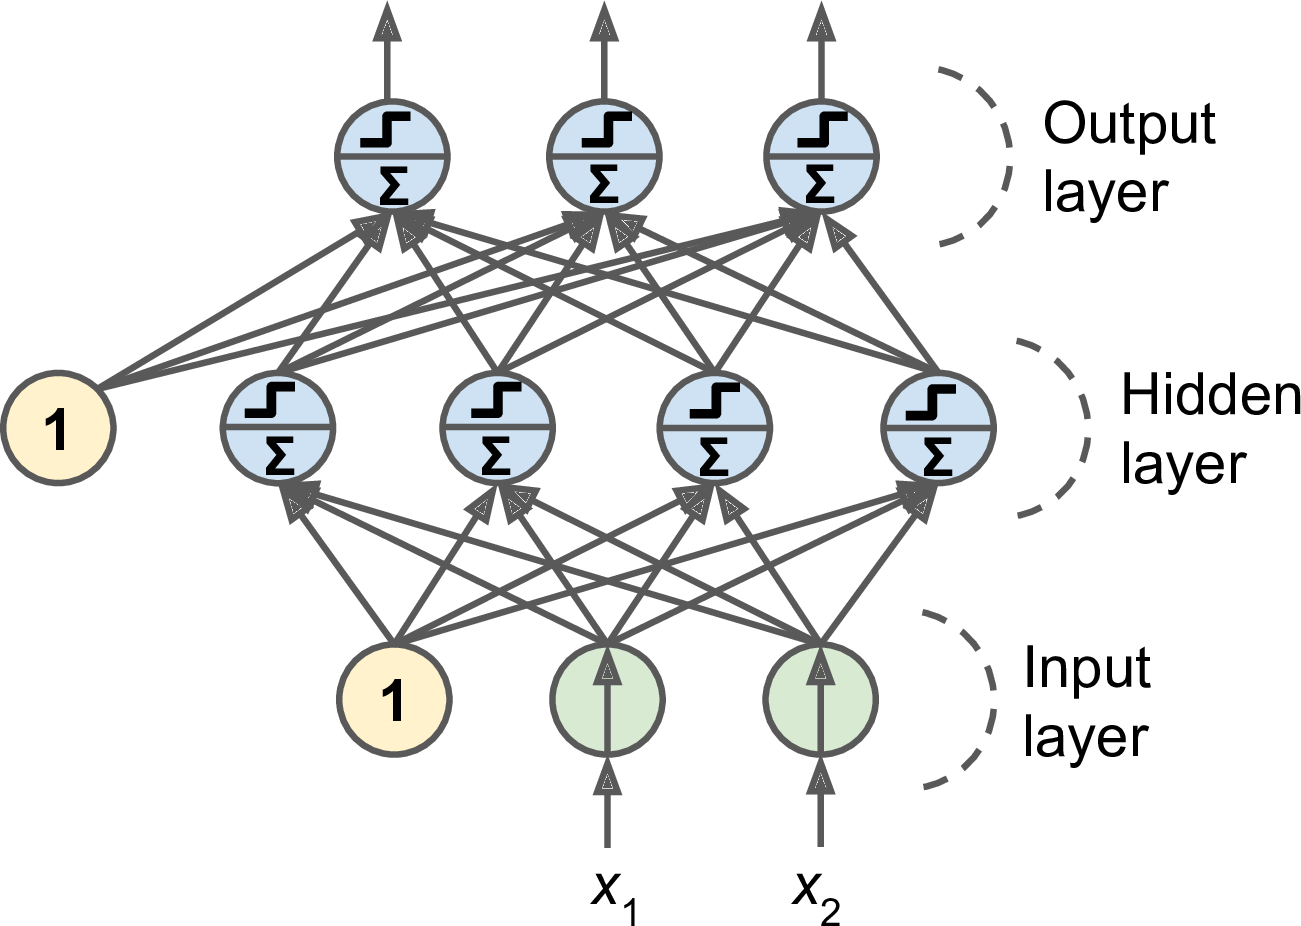

### MLP: Classificazione

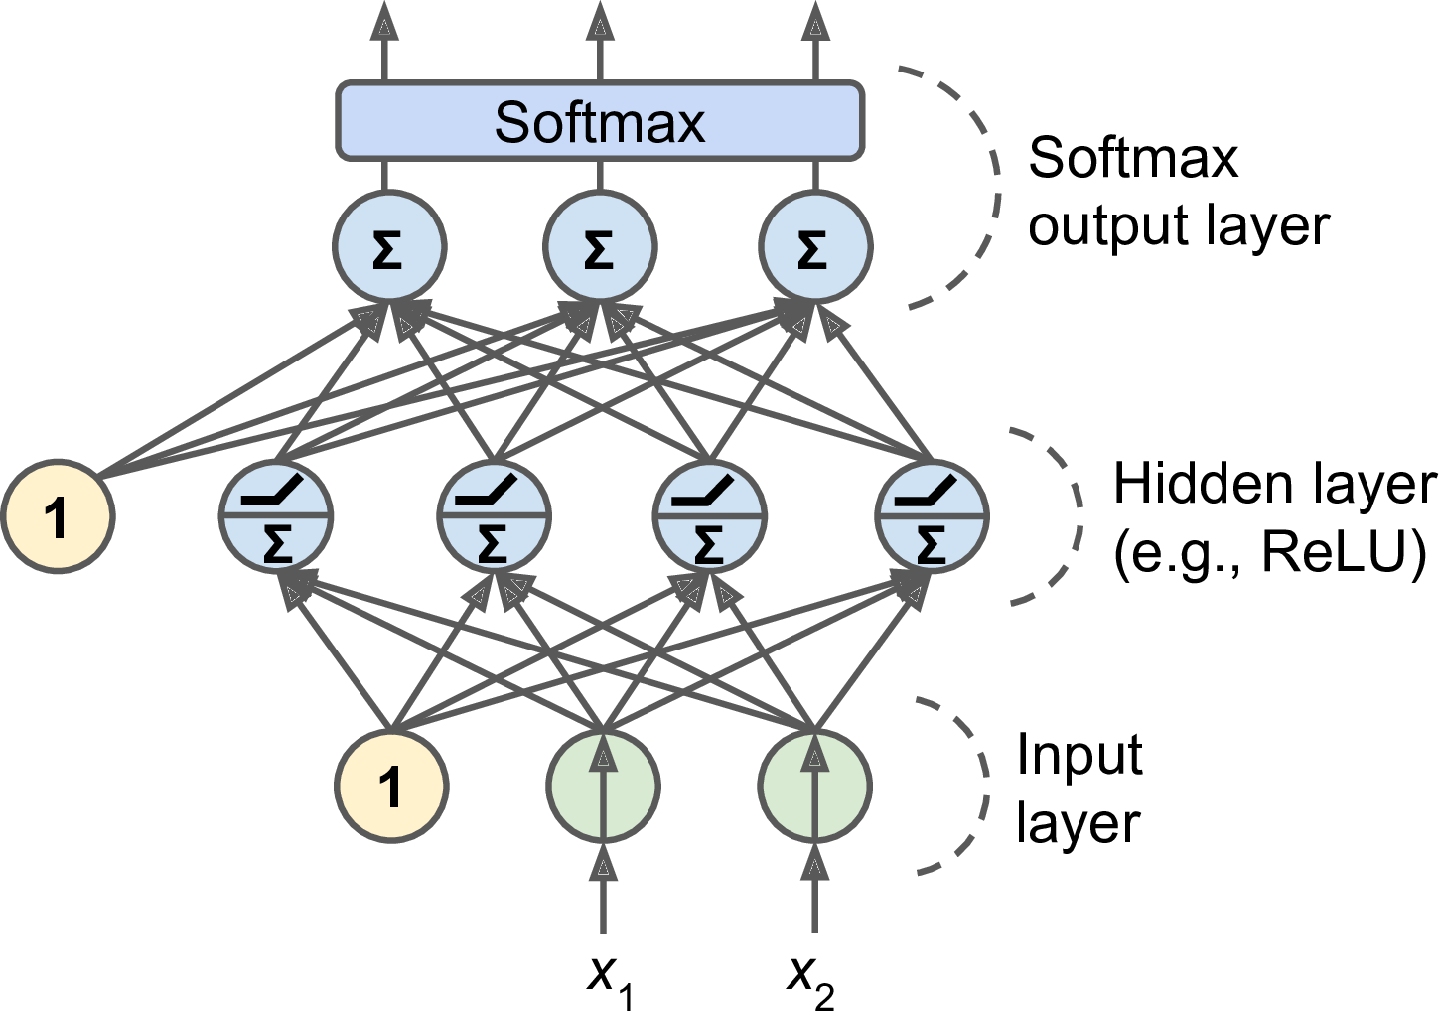

### MLP API



Esempio dal github collegato al manuale, _Python Machine Learning_, [ch. 12](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch12/)


In [18]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        n_classes : int
            Number of classes

        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_examples, n_features] dot [n_features, n_hidden]
        # -> [n_examples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_examples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_examples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        
        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        
        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = (float(np.sum(y_train == y_train_pred)) /
                         X_train.shape[0])
            valid_acc = (float(np.sum(y_valid == y_valid_pred)) /
                         X_valid.shape[0])
           
            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

**Esempio** uso con con il dataset `mnist_784`

In [19]:
from sklearn.datasets import fetch_openml, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split

# caricamento dati da https://www.openml.org/d/554
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=350,
                                                    stratify=y, 
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(1447, 64)

In [20]:
n_epochs = 200

nn = NeuralNetMLP(n_hidden=30, 
                  l2=0.01, 
                  epochs=n_epochs, 
                  eta=0.01,
                  minibatch_size=30, 
                  shuffle=True,
                  seed=1)

nn.fit(X_train=X_train[:1100], y_train=y_train[:1100],
       X_valid=X_train[1100:], y_valid=y_train[1100:])

200/200 | Cost: 64.06 | Train/Valid Acc.: 100.00%/97.12%  

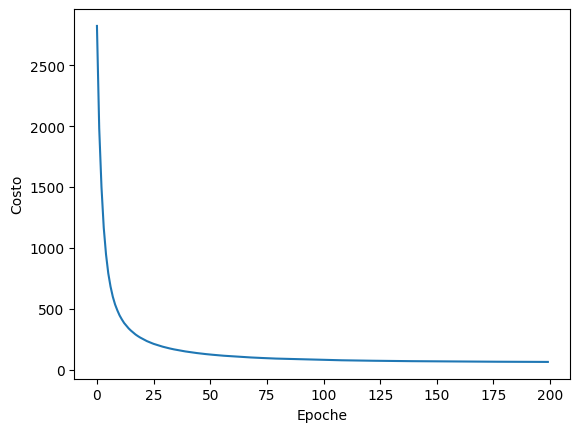

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Costo')
plt.xlabel('Epoche')
plt.show()

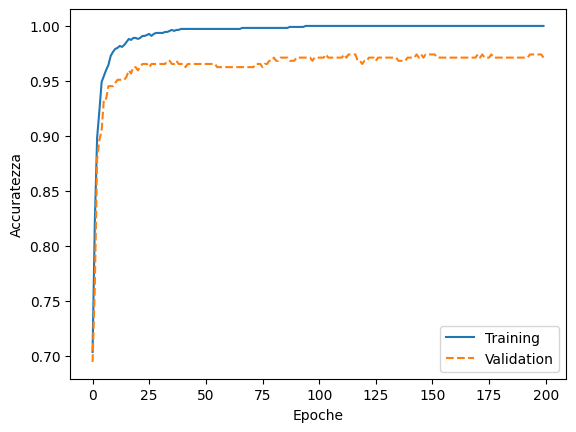

In [22]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuratezza')
plt.xlabel('Epoche')
plt.legend(loc='lower right')
plt.show()

### API `sklearn`

Classe [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) Multi-layer Perceptron classifier

- ottimizza la log-loss tramite algoritmi (_solver_): _LBFGS_, _SGD_ o _Adam_ 
- ammette più layer nascosti di dim. diverse via `hidden_layer_sizes`
    - default: `(100,)`
- `activation` per indicare la funzione di attivazione dei layer nascosti  
    - valori possibili: `'identity'`, `'logistic'`, `'tanh'`, `'relu'` (default)
    - _la stessa_ per tutti i layer
        + per modelli più complessi cfr. API per il Deep Learning:<br> `Keras`, `Tensorflow`, `PyTorch`,...

#### Esempio: Palmer Penguin Dataset

versione [`clean`](https://github.com/rianrajagede/penguin-python) del dataset

![](https://github.com/rianrajagede/penguin-python/raw/master/lter_penguins.png)

__Esempio__ con la versione-base del dataset
- da ripulire e riscalare

In [23]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#data = pd.read_csv('penguins.csv')
data = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv').drop('year', axis=1)

data.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female

In [25]:
print('\nvalori nulli (pre):',pd.isnull(data.values).sum())
imputer = SimpleImputer(strategy='most_frequent')
data.iloc[:, :] = imputer.fit_transform(data)
print('\nvalori nulli (post):',pd.isnull(data.values).sum())
data = data.dropna()


valori nulli (pre): 19

valori nulli (post): 0


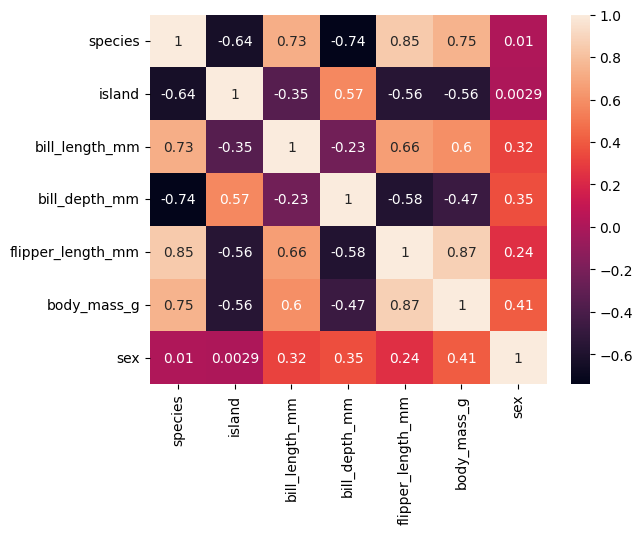

In [26]:
species_encoder = OrdinalEncoder()
island_encoder = OrdinalEncoder()
sex_encoder = OrdinalEncoder()
data[['species']] = species_encoder.fit_transform(data[['species']]).astype(int)
data[['island']] = island_encoder.fit_transform(data[['island']])
data[['sex']] = sex_encoder.fit_transform(data[['sex']])

sns.heatmap(data.corr(), annot=True);

In [27]:
X = data.iloc[:,1:-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data["species"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(2), solver='sgd', #verbose=True,
                    learning_rate_init=0.01, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print("Training set score: %.2f" % (mlp.score(X_train, y_train)*100))
print("    Test set score: %.2f" % (mlp.score(X_test, y_test)*100))

Training set score: 99.22
    Test set score: 98.84


**Esempio** 

- come il percettrone precedente sul dataset delle cifre (`digits`)

In [29]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("    Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
    Test set score: 0.977778


#### Esempio dalla doc. `scikit-learn`

`MLPClassifier` con dataset MNIST 

+ Mostra i coefficienti della rete appresi per approfondire il comportamento: 
    - struttura? regolarizzazione? learning rate adeguato?

+ Dataset di cifre scritte a mano `28x28` $\to$ `784` feature. 
    - primo layer: shape `(784, hidden_layer_sizes[0])`
    - si può visualizzare una colonna della matrice pesi come immagine `28x28`

+ Per maggiore velocità si usano poche unità nascoste, e per poche iterate. 
    - con più iterate pesi _più regolari_ a livello visivo

+ **NB** con 8 iterate verrebbe lanciato un warning per mancata convergenza

In [30]:
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning

# caricamento dati da https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')
X = X / 255.0
# partizionamento in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
# creazione MLP
mlp = MLPClassifier(hidden_layer_sizes=(40,), max_iter=50, # orig. 8  
                    alpha=1e-4, solver="sgd", random_state=1, learning_rate_init=0.2,)
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.958571


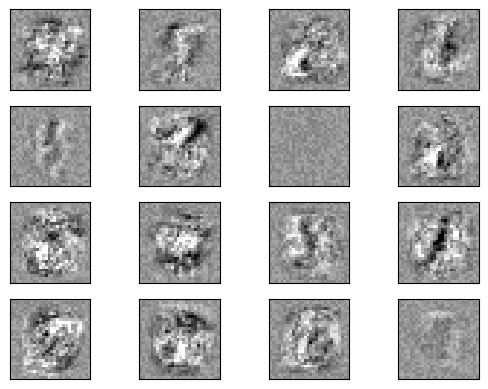

In [31]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

#### Esempio: Confronto di strategie per MLP

Visualizza alcune curve di loss (in fase di training) per diverse strategie di learning stocastiche: SGD e Adam

- si usano diversi piccoli dataset per i quali L-BFGS sarebbe più appropriata
- si noti come i risultati possano dipendere molto da `learning_rate_init`


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.504185
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.503452
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

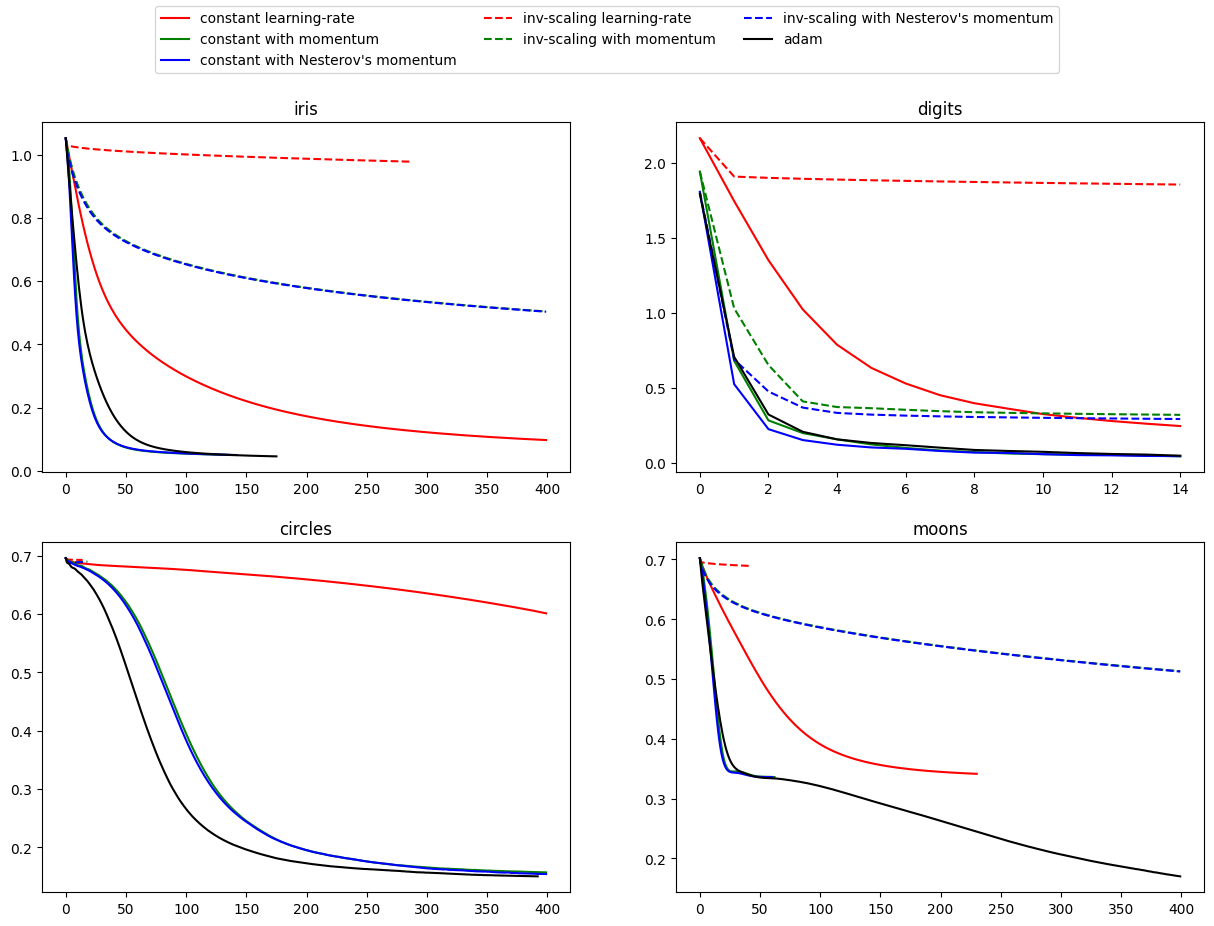

In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
    datasets.make_moons(noise=0.3, random_state=0),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

#### Esempio: Variazioni sulla regolarizzazione 

Confronto fra diversi valori del parametro `alpha` su datasets sintetici

+ plot con le superfici di decisione relative a valori diversi di `alpha` 
+ la _regolarizzazione_ contrasta il _sovradattamento_ vincoando la crescita dei pesi:
    - aumentando `alpha` può correggere casi di _varianza elevata_ favorendo pesi più piccoli<br> $\to$ confine di decisione con meno curve 
    - diminuendo `alpha` può correggere casi di _bias elevato_ favorendo pesi più grandi<br> $\to$ confine di decisione più complesso



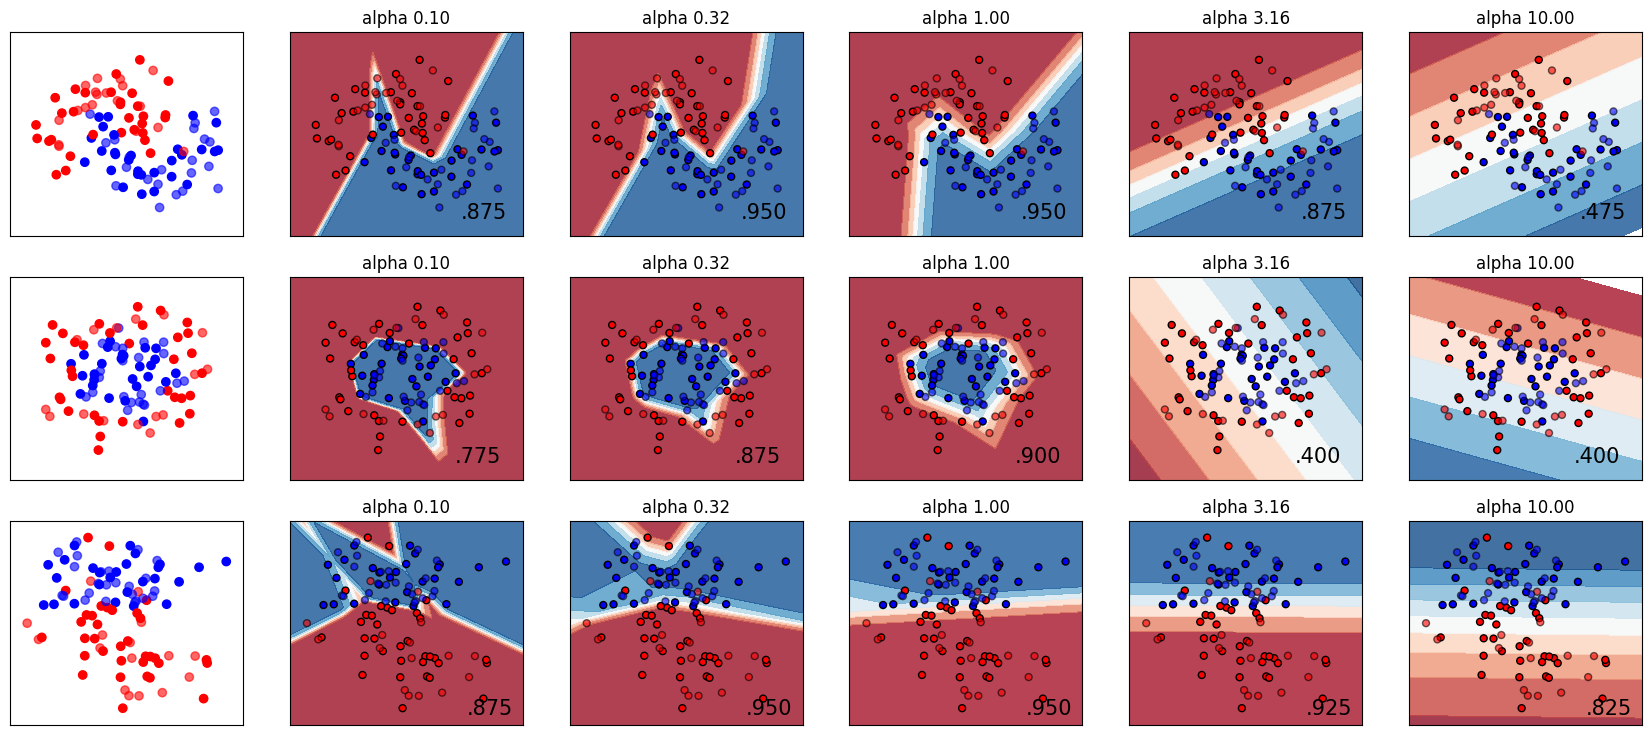

In [33]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

### Esercizi

0. Modificare un esempio, premettere la ricerca di una buona scelta degli iperparametri e confrontare i risultati
1. Creare MLP con due layer nascosti e confrontare le prestazioni
2. Classificazione multi etichetta, Creando un problema/dataset ad hoc con `datasets.make_multilabel_classification`


## MLP per la Regressione

Classe [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) ottimizza l'errore quadratico usando LBFGS o SGD.

- ammete un regolarizzatore aggiunto alla loss che riduce (_shrinks_) i parametri per evitare il sovradattamento






In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
seed = 42

X, y = make_regression(n_samples=200, n_features=50, noise=2.6, bias=1, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=seed)

regr = MLPRegressor(hidden_layer_sizes=(4,), solver='sgd', max_iter=1500, random_state=seed).fit(X_train, y_train)

print("R^2:",regr.score(X_test, y_test))

R^2: 0.985039209619598


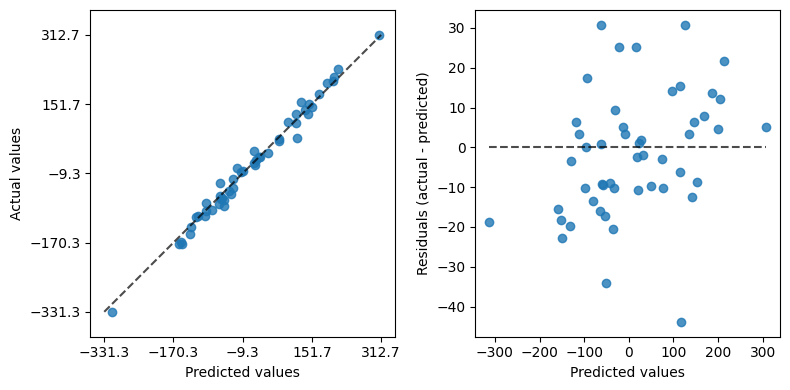

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(regr, X_test, y_test, kind="actual_vs_predicted", ax=axs[0])
PredictionErrorDisplay.from_estimator(regr, X_test, y_test, kind="residual_vs_predicted", ax=axs[1])
plt.tight_layout()

In [36]:
from sklearn.datasets import load_diabetes 

dia = load_diabetes()
# print(dia.DESCR)
X, y = dia.data, dia.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=seed)

dia_regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', 
                        solver='sgd', max_iter=500, random_state=seed)
dia_regr.fit(X_train, y_train)

print("R^2:", dia_regr.score(X_test, y_test))

R^2: 0.494757665978085


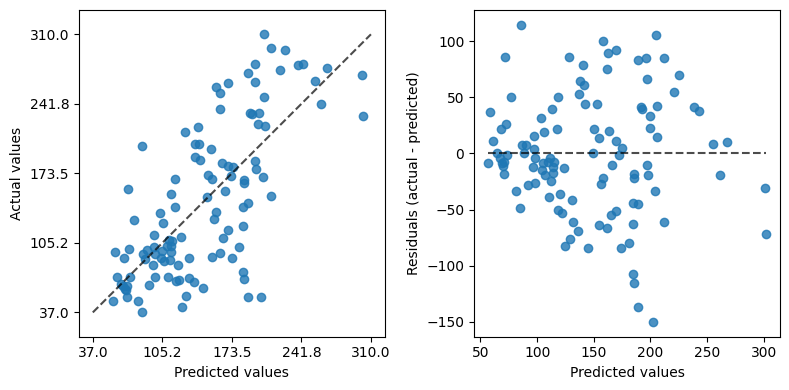

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(dia_regr,X_test,y_test, 
                                      kind="actual_vs_predicted", ax=axs[0])
PredictionErrorDisplay.from_estimator(dia_regr,X_test,y_test, 
                                      kind="residual_vs_predicted", ax=axs[1])
plt.tight_layout()

#### Esercizio

- Usare la cross validation per la scelta dei valoti degli iperparametri, ad es. [`model_selection.cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)

## Modelli Neurali non supervisionati

si veda nella [guida](https://scikit-learn.org/stable/modules/neural_networks_unsupervised.html)

### RBM

**Restricted Boltzmann Machine** per la _feature extraction_

+ producono buone feature per alimentare classificatori lineari come percettroni (e SVM) 
    + massimizzano la likelihood dei dati generati attraverso un particolare modello grafico:  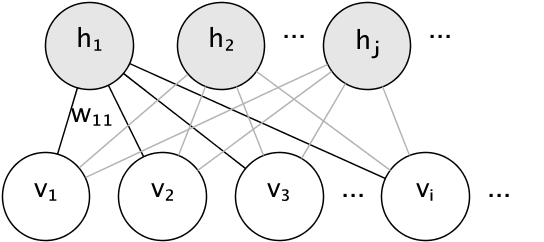 
+ `BernoulliRBM` assume input binari o valori tra 0 e 1, che codificano la probabilità che la feature risulti accesa
 - **esempio**: [RBM features for digit classification](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py) nella doc. di `scikit-learn`

#### Esempio *Pima Indians Diabetes Database* 

problema di classificazione, da [Kaggle](https://www.kaggle.com/code/tsheposono/mlp-neural-network-bernoulli-rbm/)

In [38]:
import pandas as pd
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from pylab import rcParams
plt.rcParams["figure.figsize"] = [7,7]

df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [39]:
#sns.heatmap(df.isnull())
#plt.title("Missing Value")
#plt.show()
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

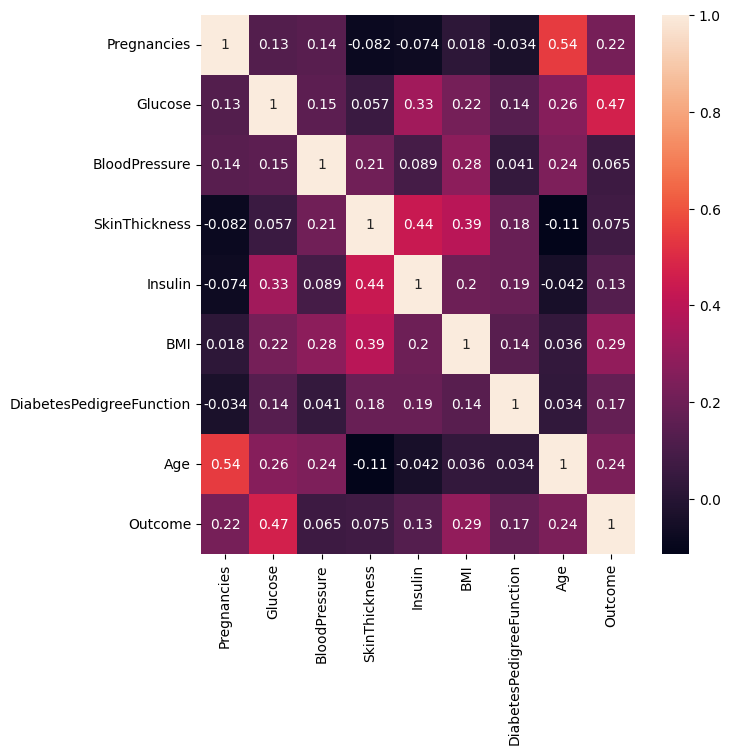

In [40]:
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, annot_kws={"size":10})
plt.show()

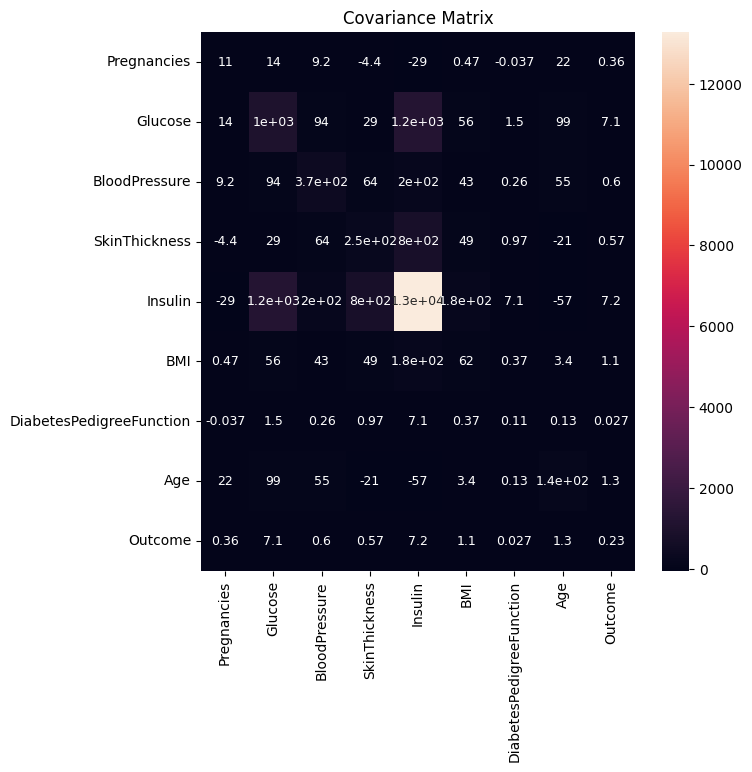

In [41]:
dfcov = df.cov()
sns.heatmap(dfcov, annot=True, annot_kws={"size":9})
plt.title("Covariance Matrix")
plt.show()

In [42]:
x = df[["Pregnancies","Glucose","BloodPressure","SkinThickness",
        "Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df.iloc[::,-1]

In [43]:
x_trainMLP, x_testMLP, y_trainMLP, y_testMLP = train_test_split(x,y,test_size=0.2,random_state=0)
scalerMLP = StandardScaler()
x_trainMLP = scalerMLP.fit_transform(x_trainMLP)
x_testMLP = scalerMLP.transform(x_testMLP)
MLP = MLPClassifier(max_iter=1000)
MLP.fit(x_trainMLP,y_trainMLP)

MLPClassifier(max_iter=1000)

In [44]:
y_predMLP = MLP.predict(x_testMLP)
pd.DataFrame({"Reale":y_testMLP, "Predetto":y_predMLP})

Reale  Predetto
661      1         1
122      0         0
113      0         0
14       1         1
529      0         0
..     ...       ...
476      1         0
482      0         0
230      1         0
527      0         0
380      0         0

[154 rows x 2 columns]

In [45]:
classificationreportMLP = pd.DataFrame(metrics.classification_report(y_testMLP,y_predMLP,output_dict=True)).transpose()
classificationreportMLP

precision    recall  f1-score     support
0              0.845455  0.869159  0.857143  107.000000
1              0.681818  0.638298  0.659341   47.000000
accuracy       0.798701  0.798701  0.798701    0.798701
macro avg      0.763636  0.753728  0.758242  154.000000
weighted avg   0.795514  0.798701  0.796775  154.000000

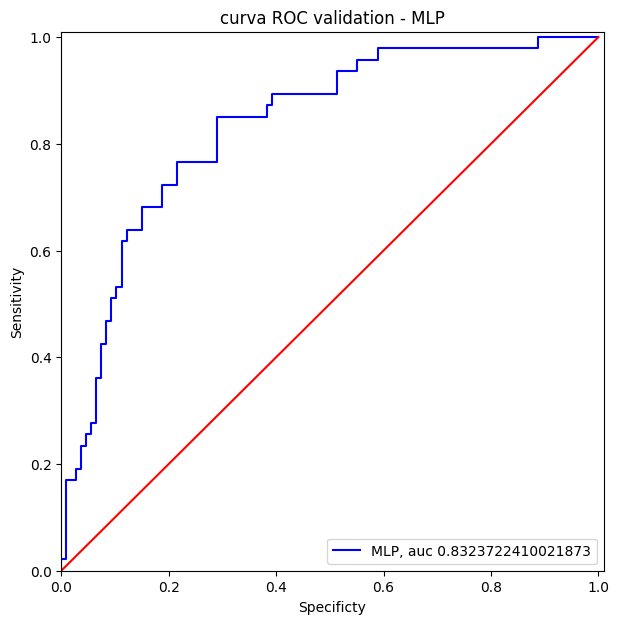

In [46]:
y_predMLP_proba = MLP.predict_proba(x_testMLP)[::,1]
fprMLP,tprMLP,_ = metrics.roc_curve(y_testMLP,y_predMLP_proba)
aucMLP = metrics.roc_auc_score(y_testMLP,y_predMLP_proba)
plt.plot(fprMLP,tprMLP,label="MLP, auc " +str(aucMLP),color="blue")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificty")
plt.ylabel("Sensitivity")
plt.title("curva ROC validation - MLP")
plt.legend(loc=4)
plt.show()

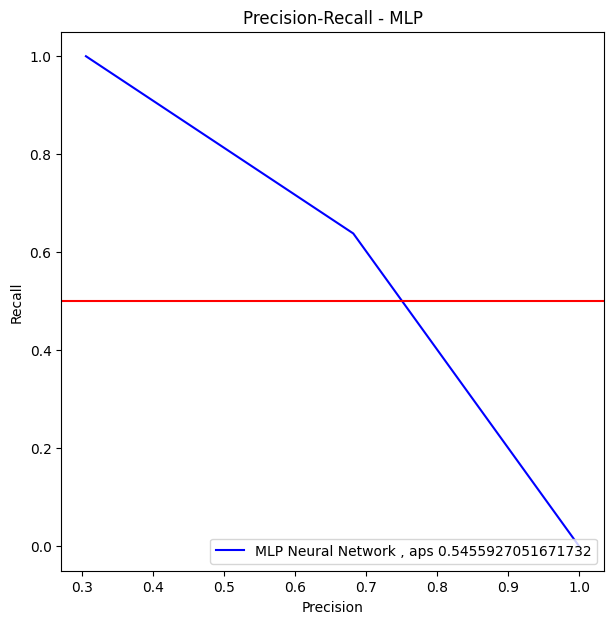

In [47]:
precisionMLP, recallMLP, thresholdMLP = metrics.precision_recall_curve(y_testMLP,y_predMLP)
apsMLP = metrics.average_precision_score(y_testMLP,y_predMLP)
plt.plot(precisionMLP, recallMLP,label="MLP Neural Network , aps " +str(apsMLP),color="blue")
plt.axhline(y=0.5,color="red")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision-Recall - MLP")
plt.legend(loc=4)
plt.show()

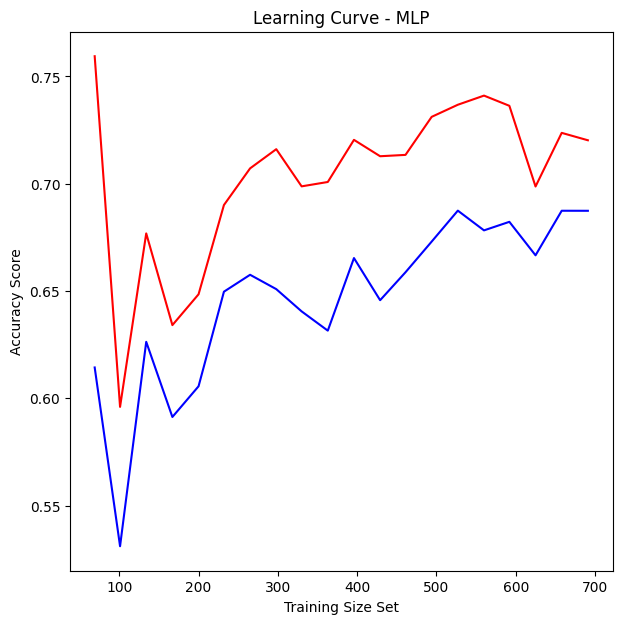

In [48]:
trainsizeMLP, trainscoreMLP, testscoreMLP = learning_curve(MLPClassifier(solver='sgd', max_iter=500), x, y, 
                                                           cv=10, n_jobs=-1, 
                                                           scoring="accuracy",
                                                           train_sizes=np.linspace(0.1,1.0,20))
trainscoreMLP_mean = np.mean(trainscoreMLP,axis=1)
trainscoreMLP_std = np.std(trainscoreMLP,axis=1)
testscoreMLP_mean = np.mean(testscoreMLP,axis=1)
testscoreMLP_std = np.std(testscoreMLP,axis=1)
plt.plot(trainsizeMLP,trainscoreMLP_mean, color="red", label="Training score")
plt.plot(trainsizeMLP,testscoreMLP_mean, color="blue", label="Cross-Validation score")
plt.xlabel("Training Size Set")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve - MLP")
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
x_trainRBM, x_testRBM, y_trainRBM, y_testRBM = train_test_split(x,y,test_size=0.2,random_state=0)
scalerRBM = StandardScaler()
x_trainRBM = scalerRBM.fit_transform(x_trainRBM)
x_testRBM = scalerRBM.transform(x_testRBM)
logreg = LogisticRegression()
RBM = BernoulliRBM()
classifier = Pipeline(steps=([("rbm",RBM),("logreg",logreg)]))
classifier.fit(x_trainRBM,y_trainRBM)

Pipeline(steps=[('rbm', BernoulliRBM()), ('logreg', LogisticRegression())])

In [50]:
y_predRBM = classifier.predict(x_testRBM)
pd.DataFrame({"Actual":y_testRBM, "Predicted":y_predRBM})

Actual  Predicted
661       1          1
122       0          0
113       0          0
14        1          1
529       0          0
..      ...        ...
476       1          1
482       0          0
230       1          1
527       0          0
380       0          0

[154 rows x 2 columns]

In [51]:
classificationreportRBM = pd.DataFrame(metrics.classification_report(y_testRBM,y_predRBM,output_dict=True)).transpose()
classificationreportRBM

precision    recall  f1-score     support
0              0.838710  0.728972  0.780000  107.000000
1              0.524590  0.680851  0.592593   47.000000
accuracy       0.714286  0.714286  0.714286    0.714286
macro avg      0.681650  0.704912  0.686296  154.000000
weighted avg   0.742842  0.714286  0.722804  154.000000

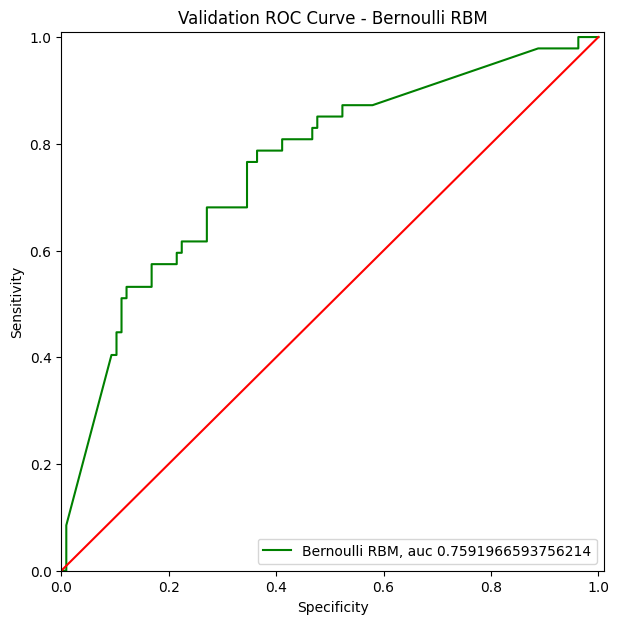

In [52]:
y_predRBM_proba = classifier.predict_proba(x_testRBM)[::,1]
fprRBM,tprRBM,_ = metrics.roc_curve(y_testRBM,y_predRBM_proba)
aucRBM = metrics.roc_auc_score(y_testRBM,y_predRBM_proba)
plt.plot(fprRBM,tprRBM,label="Bernoulli RBM, auc " +str(aucRBM),color="green")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("Validation ROC Curve - Bernoulli RBM")
plt.legend(loc=4)
plt.show()

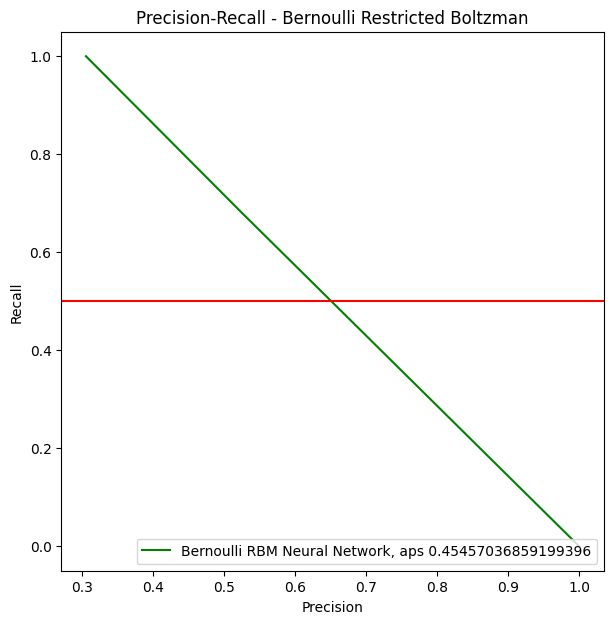

In [53]:
precisionRBM, recallRBM, thresholdRBM = metrics.precision_recall_curve(y_testRBM,y_predRBM)
apsRBM = metrics.average_precision_score(y_testRBM,y_predRBM)
plt.plot(precisionRBM, recallRBM,label="Bernoulli RBM Neural Network, aps " +str(apsRBM),color="green")
plt.axhline(y=0.5,color="red")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision-Recall - Bernoulli Restricted Boltzman")
plt.legend(loc=4)
plt.show()

#### Playground Tensorflow

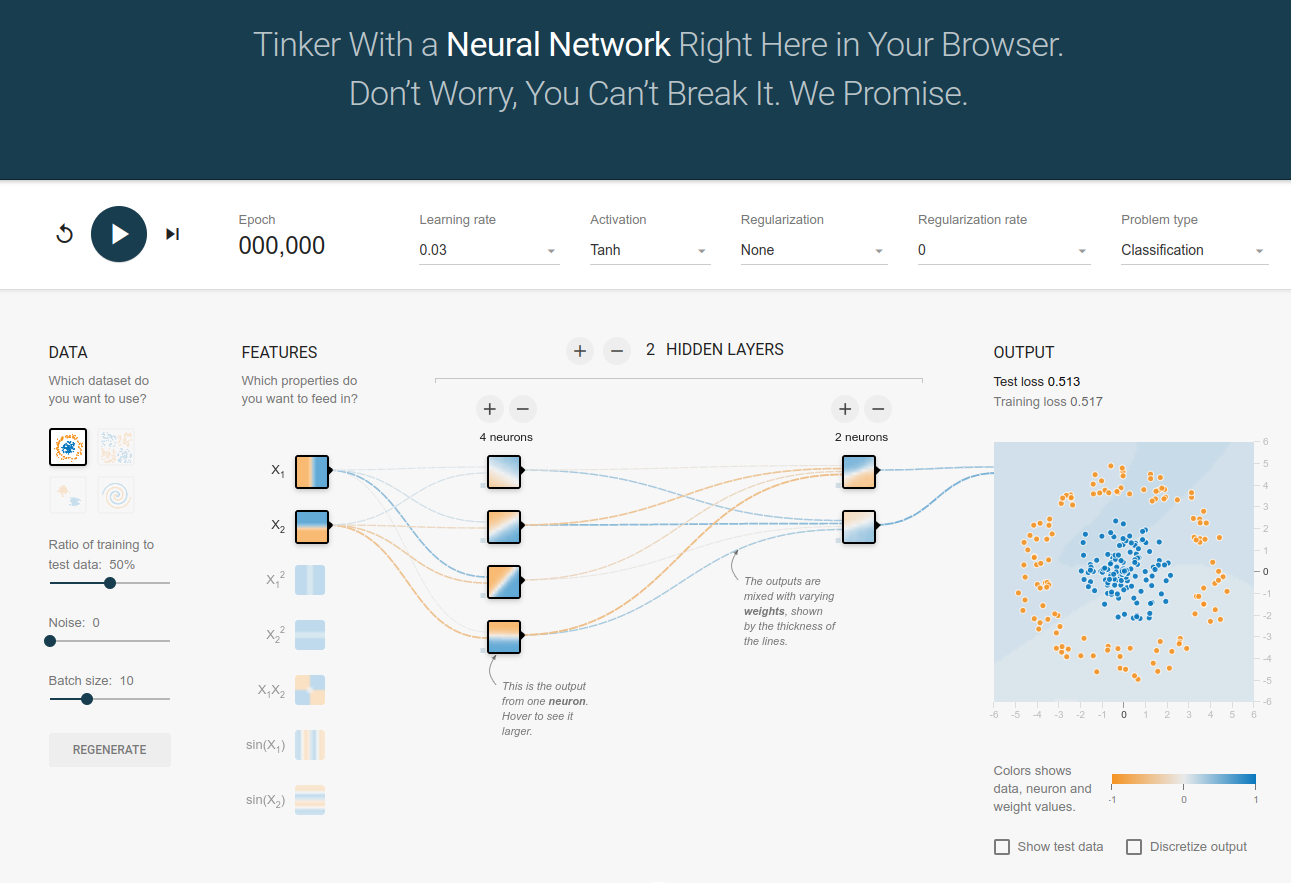

https://playground.tensorflow.org/

#### Esercizi

- Utilizzare una Pipeline con diverso classificatore finale